## We want to change this lady's dress to a different colour!

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

Type:  <class 'numpy.ndarray'> 
Dims: (800, 463, 3)


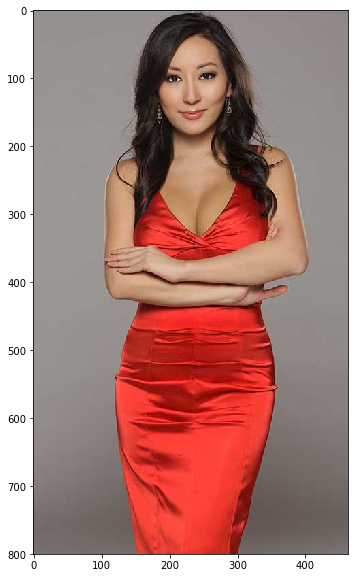

In [3]:
photo_data = misc.imread('./LinaSo.jpg')
print("Type: ", type(photo_data), "\nDims:", photo_data.shape)

%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

#### Now we want to focus on the dress and change it to black. Let's start with the areas where the red is too much, compared to the other colours and change them to black!

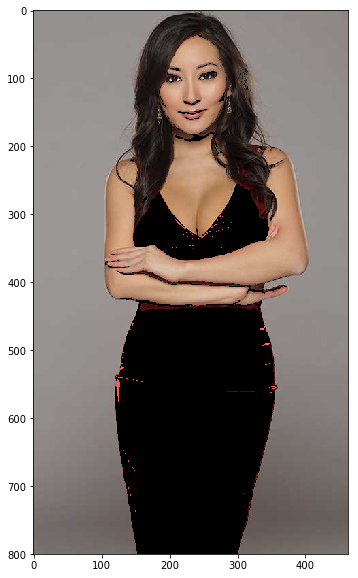

In [4]:
photo_data = misc.imread('./LinaSo.jpg')

# Prep colour mask
red_mask = photo_data[:, :, 0] > 100
green_mask = photo_data[:, :, 1] < 85
blue_mask = photo_data[:, :, 2] < 75
colour_mask = np.logical_and(red_mask, green_mask, blue_mask)

photo_data[colour_mask] = 0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

#### As you can see, the lips, neck and other areas are also being affected. Looking at the picture, it appears that the red dress is mostly within the lower two-thirds in height and after 1/4th and upto 3/4th in length of the picture. So lets add that area-based filter to the above.

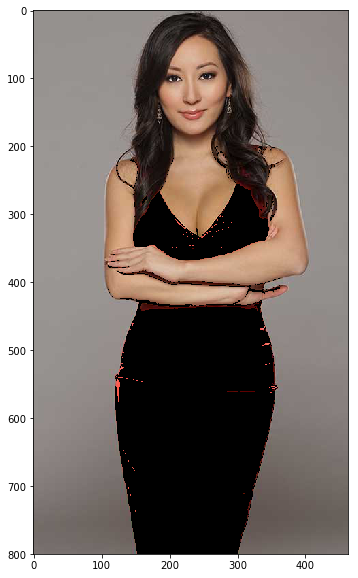

In [5]:
photo_data = misc.imread('./LinaSo.jpg')

# Prep location mask
total_rows, total_cols, layer = photo_data.shape

top = int(total_rows / 4)
bottom = total_rows
left = int(total_cols / 4) - 5
right = int(total_cols / 4 * 3) + 15

height_arr = np.arange(0, total_rows)
width_arr = np.arange(0, total_cols)

height_mask = np.logical_and(height_arr >= top, height_arr <= bottom)
width_mask = np.logical_and(width_arr >= left, width_arr <= right)
coord_mask = np.outer(height_mask, width_mask)

final_mask = np.logical_and(coord_mask, colour_mask)

photo_data[final_mask] = 0

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

#### Instead of setting it to black, we can try to set it to some other colour by manipulating the 3 RGB layers...

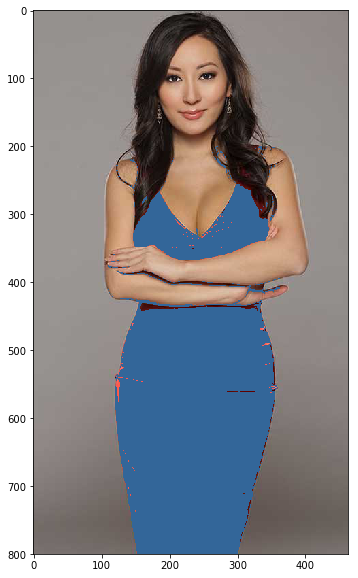

In [6]:
photo_data = misc.imread('./LinaSo.jpg')

photo_data[final_mask] = [51, 102, 153]

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

#### What I can't seem to do is swap the colours in such a way that the texture on the dress is retained.